In [13]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#load the data matrics
matrix_4st = np.loadtxt('right4st.txt')
print('4 state scenario matrics has the shape:',matrix_4st.shape)

4 state scenario matrics has the shape: (17859, 28)


In [15]:
a = matrix_4st[np.where(matrix_4st[:,0]==4),:]

In [16]:
a

array([[[4., 0., 1., ..., 0., 0., 1.],
        [4., 0., 1., ..., 0., 0., 2.],
        [4., 0., 1., ..., 0., 3., 0.],
        ...,
        [4., 6., 7., ..., 0., 4., 3.],
        [4., 6., 7., ..., 0., 4., 3.],
        [4., 7., 6., ..., 0., 5., 1.]]])

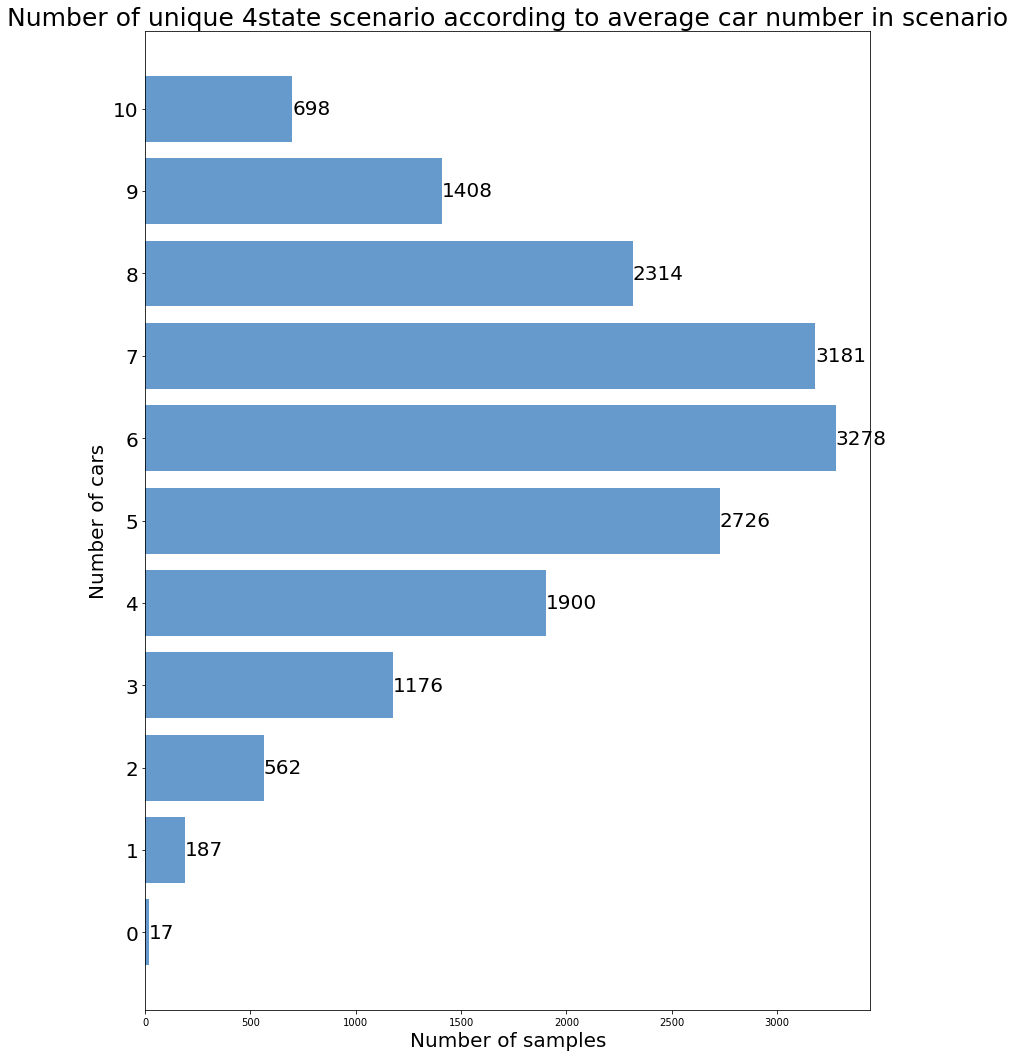

In [43]:
fig, ax = plt.subplots(figsize=(13,18))
value = []
for i in range(11):
    num = matrix_4st[np.where(matrix_4st[:,0]==i),:].shape[1]
    value.append(num)
f = ax.barh(range(11), value, color='#6699CC')
for rect in f:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
            int(w-1), ha='left', va='center', fontsize = 20)
ax.set_yticks(range(11))
ax.set_yticklabels(range(11),fontsize = 20)
ax.set_title("Number of unique 4state scenario according to average car number in scenario",fontsize = 25)
plt.ylabel('Number of cars',fontsize = 20)
plt.xlabel('Number of samples',fontsize = 20)
plt.show()

In [18]:
car1 = matrix_4st[np.where(matrix_4st[:,0]==1),:]
car1 = car1[:,1:]
car1 = np.squeeze(car1,axis= (0,))
str1 = ";".join(str(i) for i in car1)
str1 = str1.split(";")
str1

['[1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.\n 0. 0. 0. 0.]',
 '[1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.\n 1. 0. 1. 0.]',
 '[1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.\n 1. 0. 0. 1.]',
 '[1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.\n 1. 0. 1. 0.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 0.\n 0. 0. 1. 1.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 2. 0.\n 0. 0. 2. 0.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.\n 0. 1. 1. 1.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.\n 0. 1. 0. 2.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.\n 1. 0. 1. 1.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 0.\n 0. 0. 0. 2.]',
 '[1. 0. 1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.\n 0. 

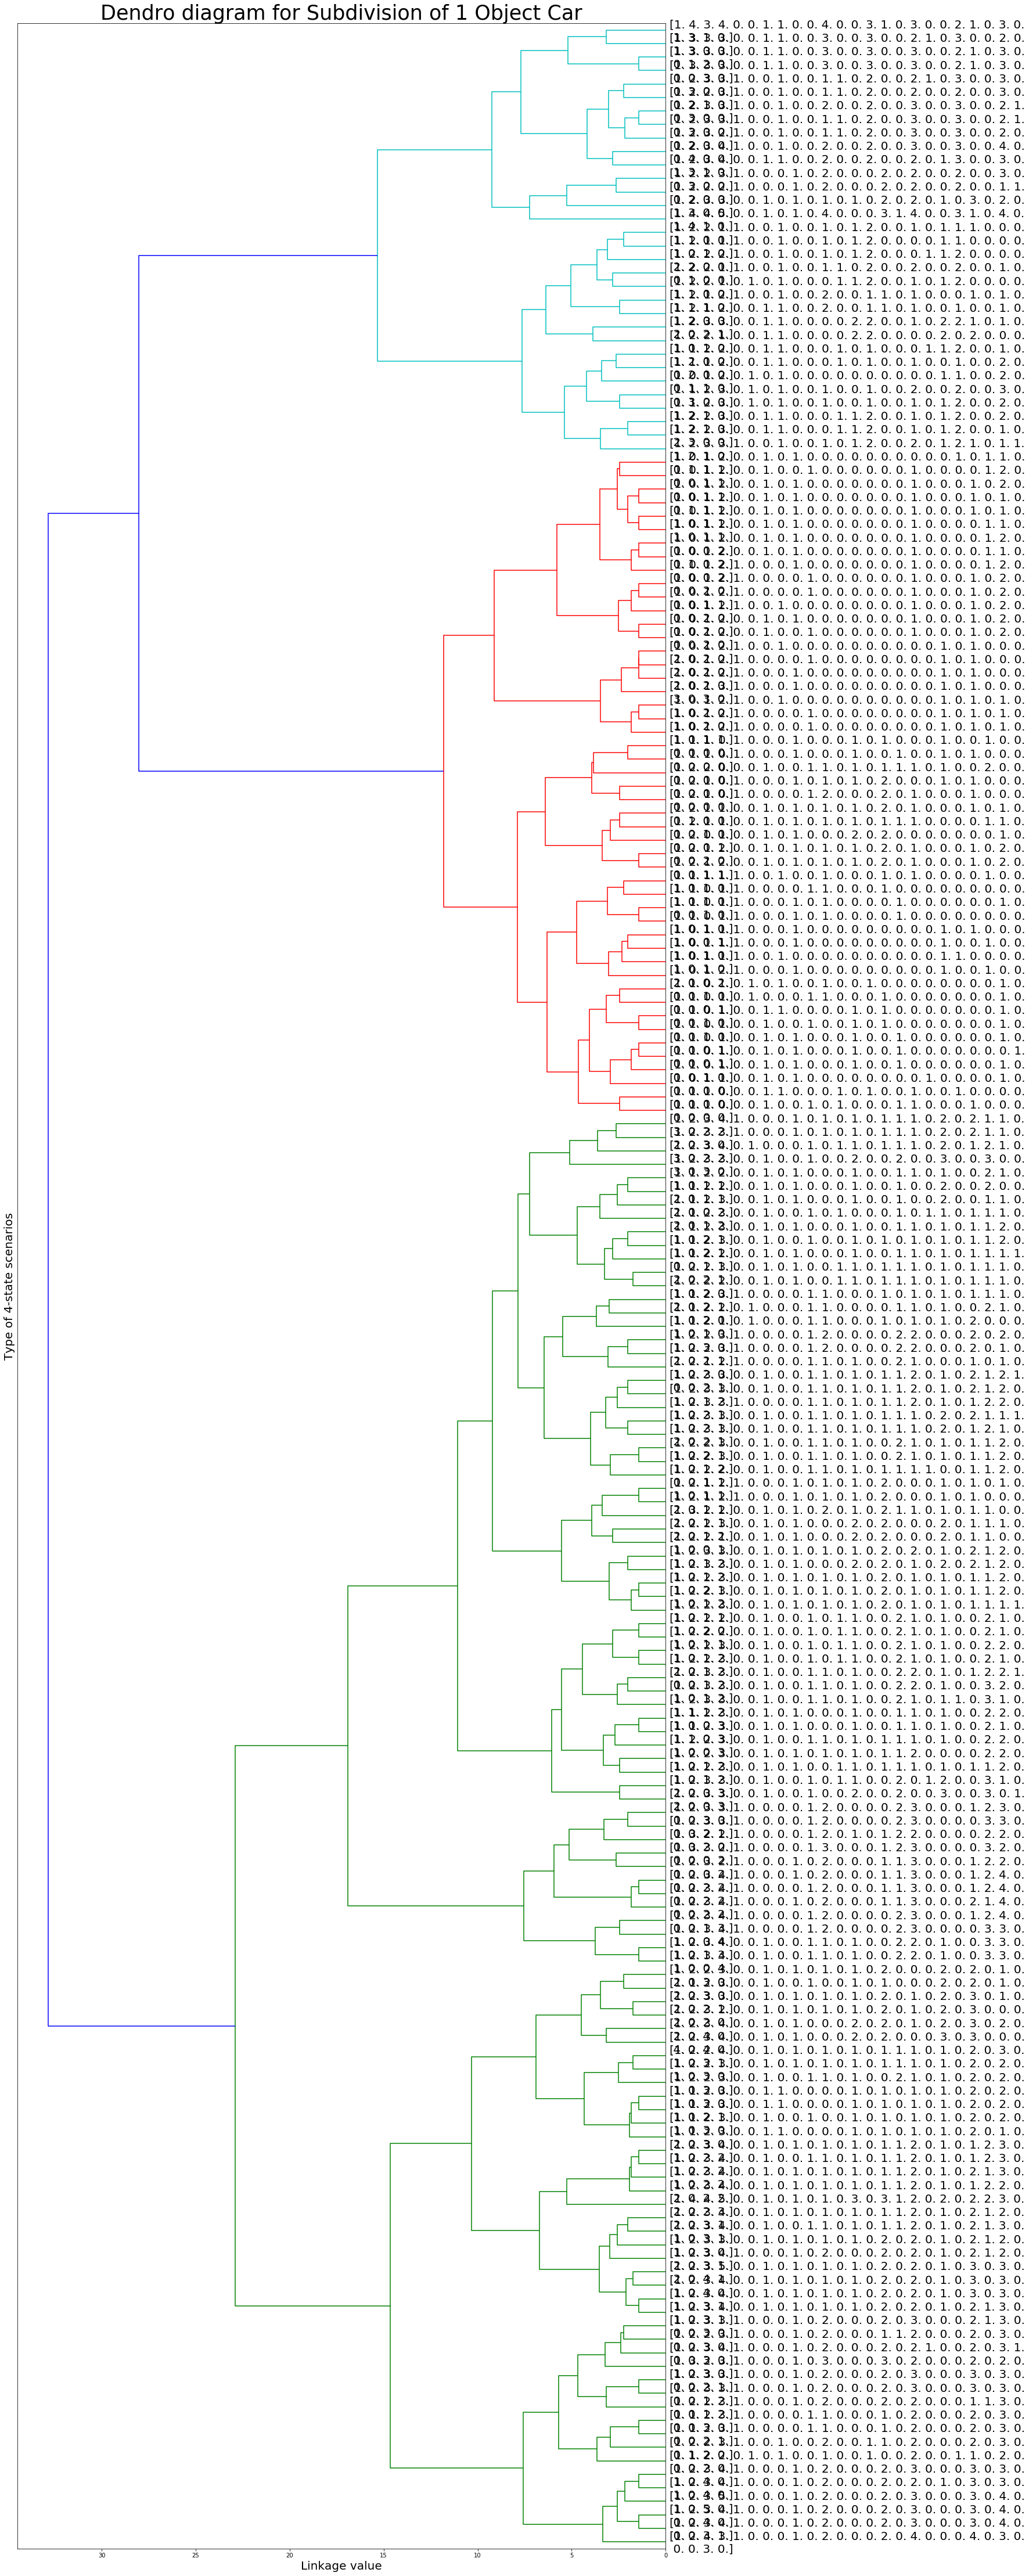

(186, 4)


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car1, 'ward')
f = fcluster(Z,0.0001,'distance')
fig = plt.figure(figsize=(20, 80))
plt.title('Dendro diagram for Subdivision of 1 Object Car',fontsize = 35)
plt.ylabel('Type of 4-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize =20)
dn = dendrogram(Z,labels=str1,orientation='left', leaf_rotation=0,
              leaf_font_size=20)
plt.show()

print(Z.shape)

In [20]:
np.set_printoptions(threshold=10000)
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[ 28.          29.           1.41421356   2.        ]
 [  7.           9.           1.41421356   2.        ]
 [  8.          11.           1.41421356   2.        ]
 [ 10.          12.           1.41421356   2.        ]
 [  5.          13.           1.41421356   2.        ]
 [ 18.          19.           1.41421356   2.        ]
 [ 27.          31.           1.41421356   2.        ]
 [ 35.          36.           1.41421356   2.        ]
 [ 15.          23.           1.41421356   2.        ]
 [ 17.          24.           1.41421356   2.        ]
 [ 21.         195.           1.41421356   3.        ]
 [ 55.          56.           1.41421356   2.        ]
 [ 59.          60.           1.41421356   2.        ]
 [ 93.          94.           1.41421356   2.        ]
 [104.         105.           1.41421356   2.        ]
 [ 91.          92.           1.41421356   2.        ]
 [ 72.          73.           1.41421356   2.        ]
 [ 85.          86.           1.41421356   2.        ]
 [146.    

29

In [22]:
car2 = matrix_4st[np.where(matrix_4st[:,0]==2),:]
car2 = car2[:,1:]
car2 = np.squeeze(car2,axis= (0,))
str2 = ";".join(str(i) for i in car2)
str2 = str2.split(";")
str2

['[2. 0. 1. 1. 1. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.\n 0. 0. 0. 1.]',
 '[2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.\n 1. 0. 1. 1.]',
 '[2. 0. 3. 5. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 2. 0. 1. 0.\n 4. 2. 3. 0.]',
 '[2. 1. 0. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.\n 0. 0. 0. 1.]',
 '[2. 1. 0. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 1. 0. 0. 1.]',
 '[2. 1. 0. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 1. 0. 1. 0.]',
 '[2. 1. 0. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 0. 1. 0.]',
 '[2. 1. 0. 1. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 0. 0. 1.]',
 '[2. 1. 0. 1. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 0. 1. 0.]',
 '[2. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 0. 0. 1.]',
 '[2. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 

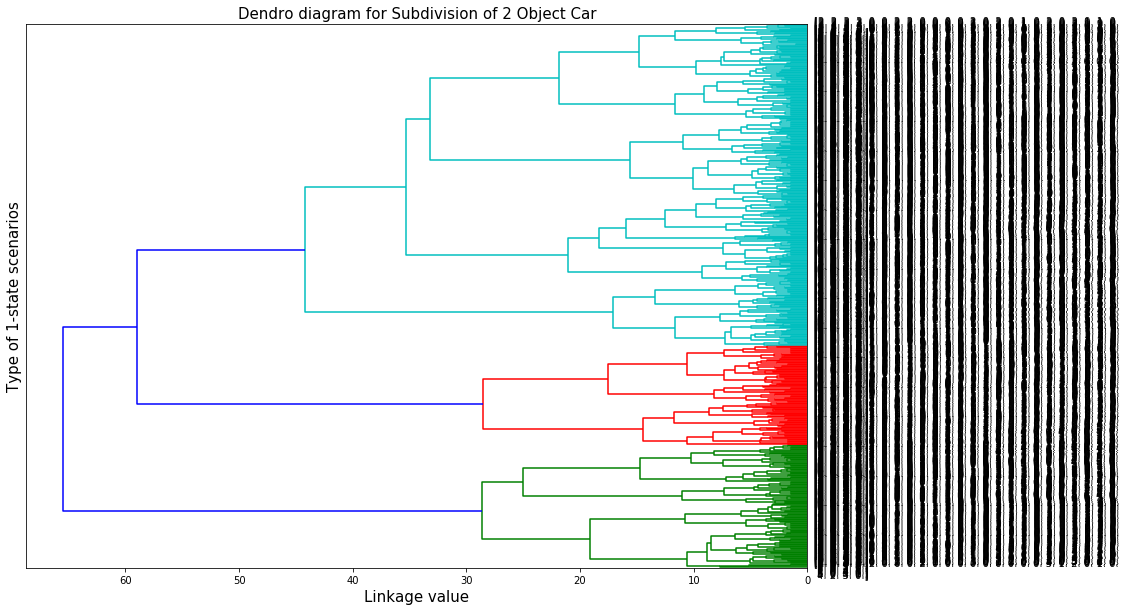

(561, 4)


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car2, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 2 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str2, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [24]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[2.94000000e+02 2.95000000e+02 1.00000000e+00 2.00000000e+00]
 [3.20000000e+01 3.40000000e+01 1.41421356e+00 2.00000000e+00]
 [9.00000000e+00 1.00000000e+01 1.41421356e+00 2.00000000e+00]
 [5.10000000e+01 5.20000000e+01 1.41421356e+00 2.00000000e+00]
 [7.20000000e+01 7.60000000e+01 1.41421356e+00 2.00000000e+00]
 [7.30000000e+01 7.70000000e+01 1.41421356e+00 2.00000000e+00]
 [7.40000000e+01 7.50000000e+01 1.41421356e+00 2.00000000e+00]
 [4.00000000e+00 5.00000000e+00 1.41421356e+00 2.00000000e+00]
 [6.00000000e+00 8.00000000e+00 1.41421356e+00 2.00000000e+00]
 [1.60000000e+01 1.70000000e+01 1.41421356e+00 2.00000000e+00]
 [7.00000000e+00 1.20000000e+01 1.41421356e+00 2.00000000e+00]
 [1.40000000e+01 1.50000000e+01 1.41421356e+00 2.00000000e+00]
 [3.70000000e+01 3.80000000e+01 1.41421356e+00 2.00000000e+00]
 [1.28000000e+02 1.29000000e+02 1.41421356e+00 2.00000000e+00]
 [1.25000000e+02 1.26000000e+02 1.41421356e+00 2.00000000e+00]
 [7.80000000e+01 7.90000000e+01 1.41421356e+00 2.000000

80

In [25]:
car3 = matrix_4st[np.where(matrix_4st[:,0]==3),:]
car3 = car3[:,1:]
car3 = np.squeeze(car3,axis= (0,))
str3 = ";".join(str(i) for i in car3)
str3 = str3.split(";")
str3

['[3. 1. 1. 0. 3. 0. 0. 0. 2. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[3. 1. 1. 2. 2. 0. 1. 0. 2. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 2. 0.\n 0. 0. 0. 2.]',
 '[3. 1. 2. 0. 2. 0. 1. 0. 2. 1. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[3. 1. 2. 1. 2. 0. 1. 0. 3. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0. 1. 0.\n 0. 0. 1. 0.]',
 '[3. 1. 2. 2. 0. 0. 3. 3. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 2. 0. 0. 0. 1.\n 1. 2. 0. 0.]',
 '[3. 1. 2. 2. 2. 0. 1. 2. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 2. 0. 0. 2. 0.\n 0. 2. 0. 0.]',
 '[3. 1. 2. 2. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 2. 0.\n 0. 0. 2. 0.]',
 '[3. 1. 2. 3. 2. 0. 1. 0. 2. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0. 2. 0.\n 1. 0. 3. 0.]',
 '[3. 1. 2. 3. 2. 0. 1. 1. 2. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 2. 0.\n 1. 0. 1. 2.]',
 '[3. 2. 0. 1. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.\n 1. 0. 0. 1.]',
 '[3. 2. 0. 1. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 

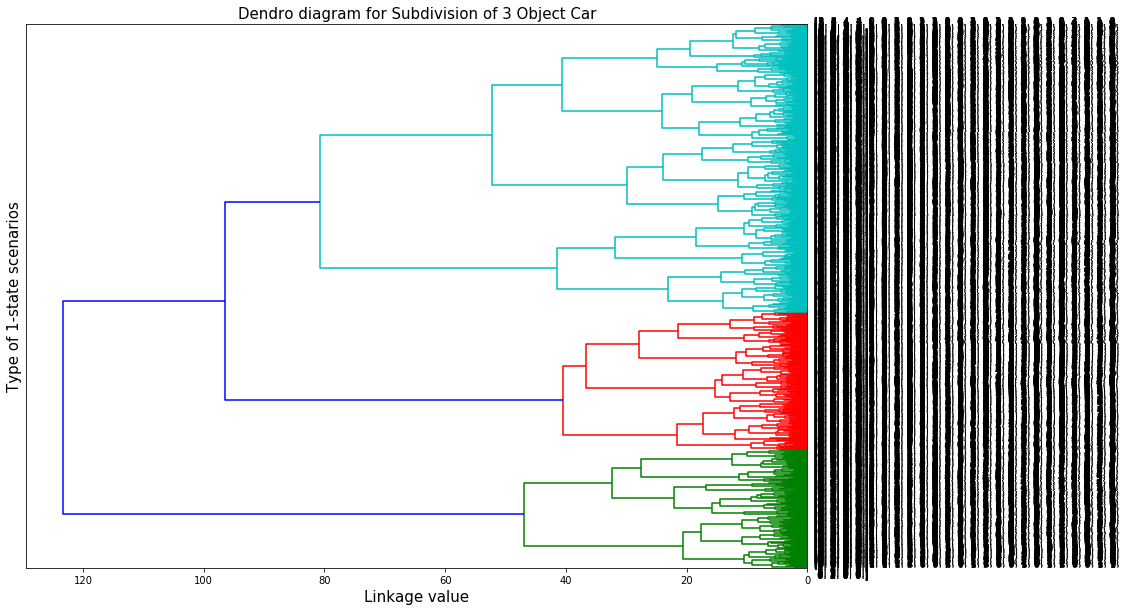

(1175, 4)


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car3, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 3 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str3, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [27]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[1.70000000e+01 2.00000000e+01 1.41421356e+00 2.00000000e+00]
 [2.10000000e+01 2.20000000e+01 1.41421356e+00 2.00000000e+00]
 [4.10000000e+01 4.20000000e+01 1.41421356e+00 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e+00 2.00000000e+00]
 [8.90000000e+01 9.10000000e+01 1.41421356e+00 2.00000000e+00]
 [6.40000000e+01 6.50000000e+01 1.41421356e+00 2.00000000e+00]
 [6.60000000e+01 6.70000000e+01 1.41421356e+00 2.00000000e+00]
 [3.01000000e+02 3.02000000e+02 1.41421356e+00 2.00000000e+00]
 [3.28000000e+02 3.30000000e+02 1.41421356e+00 2.00000000e+00]
 [1.20000000e+02 1.21000000e+02 1.41421356e+00 2.00000000e+00]
 [2.17000000e+02 2.31000000e+02 1.41421356e+00 2.00000000e+00]
 [4.13000000e+02 4.14000000e+02 1.41421356e+00 2.00000000e+00]
 [6.80000000e+01 6.90000000e+01 1.41421356e+00 2.00000000e+00]
 [1.69000000e+02 1.71000000e+02 1.41421356e+00 2.00000000e+00]
 [9.50000000e+01 9.60000000e+01 1.41421356e+00 2.00000000e+00]
 [2.73000000e+02 2.74000000e+02 1.41421356e+00 2.000000

161

In [28]:
car4 = matrix_4st[np.where(matrix_4st[:,0]==4),:]
car4 = car4[:,1:]
car4 = np.squeeze(car4,axis= (0,))
str4 = ";".join(str(i) for i in car4)
str4 = str4.split(";")
str4

['[4. 0. 1. 2. 3. 0. 1. 0. 3. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 2. 0.\n 0. 0. 0. 2.]',
 '[4. 0. 1. 3. 4. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 3. 0.\n 0. 0. 3. 0.]',
 '[4. 0. 1. 5. 3. 0. 1. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 3. 0.\n 2. 0. 3. 2.]',
 '[4. 0. 4. 5. 3. 0. 1. 0. 4. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 2. 3. 0.\n 2. 0. 3. 2.]',
 '[4. 1. 0. 1. 3. 0. 1. 0. 3. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 0. 0. 1.]',
 '[4. 1. 0. 1. 4. 0. 0. 0. 3. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.\n 0. 0. 1. 0.]',
 '[4. 1. 2. 0. 3. 0. 1. 0. 3. 1. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[4. 1. 2. 2. 2. 0. 2. 0. 3. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0. 0. 0.\n 2. 0. 2. 0.]',
 '[4. 2. 1. 0. 3. 0. 1. 0. 3. 1. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 1. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[4. 2. 3. 2. 4. 0. 0. 0. 3. 1. 2. 0. 0. 0. 1. 1. 3. 0. 0. 0. 2. 1. 2. 0.\n 0. 0. 2. 0.]',
 '[4. 2. 3. 3. 0. 0. 4. 0. 1. 3. 0. 0. 2. 0. 1. 1. 0. 0. 3. 0. 1. 2. 0. 0.\n 3. 

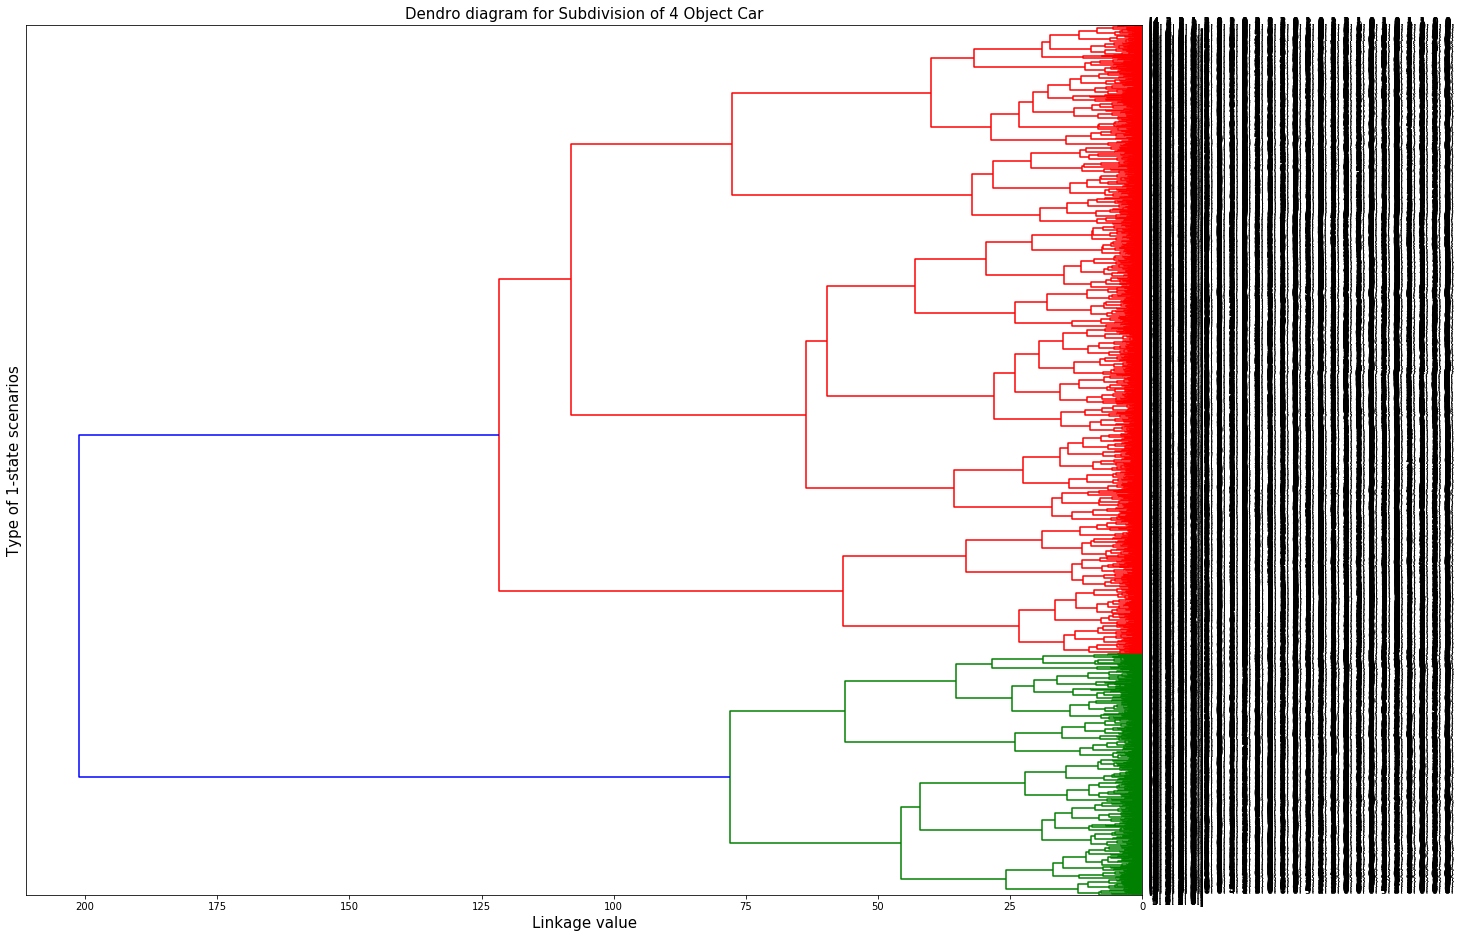

(1899, 4)


In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car4, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 16))
plt.title('Dendro diagram for Subdivision of 4 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str4, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [30]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[5.10000000e+01 5.60000000e+01 1.41421356e+00 2.00000000e+00]
 [1.40000000e+02 1.41000000e+02 1.41421356e+00 2.00000000e+00]
 [1.69000000e+02 1.73000000e+02 1.41421356e+00 2.00000000e+00]
 [1.02000000e+02 1.03000000e+02 1.41421356e+00 2.00000000e+00]
 [2.30000000e+01 2.40000000e+01 1.41421356e+00 2.00000000e+00]
 [3.94000000e+02 3.95000000e+02 1.41421356e+00 2.00000000e+00]
 [3.52000000e+02 3.53000000e+02 1.41421356e+00 2.00000000e+00]
 [4.94000000e+02 4.95000000e+02 1.41421356e+00 2.00000000e+00]
 [6.97000000e+02 6.98000000e+02 1.41421356e+00 2.00000000e+00]
 [6.99000000e+02 7.00000000e+02 1.41421356e+00 2.00000000e+00]
 [1.33000000e+02 1.57000000e+02 1.41421356e+00 2.00000000e+00]
 [7.00000000e+01 7.10000000e+01 1.41421356e+00 2.00000000e+00]
 [2.86000000e+02 3.02000000e+02 1.41421356e+00 2.00000000e+00]
 [1.62000000e+02 1.64000000e+02 1.41421356e+00 2.00000000e+00]
 [2.07000000e+02 2.08000000e+02 1.41421356e+00 2.00000000e+00]
 [2.30000000e+02 2.31000000e+02 1.41421356e+00 2.000000

238

In [31]:
car5 = matrix_4st[np.where(matrix_4st[:,0]==5),:]
car5 = car5[:,1:]
car5 = np.squeeze(car5,axis= (0,))
str5 = ";".join(str(i) for i in car5)
str5 = str5.split(";")
str5

['[5. 1. 2. 3. 0. 0. 5. 0. 5. 0. 1. 0. 0. 0. 1. 0. 2. 0. 0. 0. 2. 0. 2. 0.\n 1. 0. 3. 0.]',
 '[5. 1. 4. 4. 3. 0. 2. 0. 4. 1. 0. 0. 1. 0. 1. 0. 3. 0. 1. 0. 1. 3. 3. 0.\n 1. 0. 2. 2.]',
 '[5. 2. 3. 4. 0. 0. 5. 0. 5. 0. 2. 0. 0. 0. 2. 0. 2. 0. 1. 0. 3. 0. 3. 0.\n 1. 0. 4. 0.]',
 '[5. 3. 0. 1. 3. 0. 2. 0. 4. 1. 1. 0. 2. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 1. 0. 1. 0.]',
 '[5. 3. 2. 1. 2. 0. 3. 0. 4. 1. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0. 0. 0.\n 1. 0. 1. 0.]',
 '[5. 3. 2. 3. 3. 0. 2. 0. 3. 2. 1. 0. 2. 0. 2. 1. 0. 0. 2. 0. 2. 0. 1. 0.\n 2. 0. 3. 0.]',
 '[5. 3. 3. 0. 3. 0. 2. 0. 4. 1. 1. 0. 2. 0. 3. 0. 0. 0. 3. 0. 3. 0. 0. 0.\n 0. 0. 0. 0.]',
 '[5. 3. 3. 1. 4. 0. 1. 0. 5. 0. 2. 0. 1. 0. 2. 1. 2. 0. 1. 0. 1. 2. 0. 0.\n 1. 0. 1. 0.]',
 '[5. 3. 3. 2. 3. 0. 2. 0. 3. 2. 1. 0. 2. 0. 3. 0. 0. 0. 3. 0. 3. 0. 0. 0.\n 2. 0. 2. 0.]',
 '[5. 3. 3. 2. 4. 0. 1. 0. 3. 2. 2. 0. 1. 0. 3. 0. 1. 0. 2. 0. 3. 0. 0. 0.\n 2. 0. 2. 0.]',
 '[5. 3. 3. 4. 4. 0. 1. 0. 3. 2. 1. 0. 2. 0. 3. 0. 1. 0. 2. 0. 2. 1. 4. 0.\n 0. 

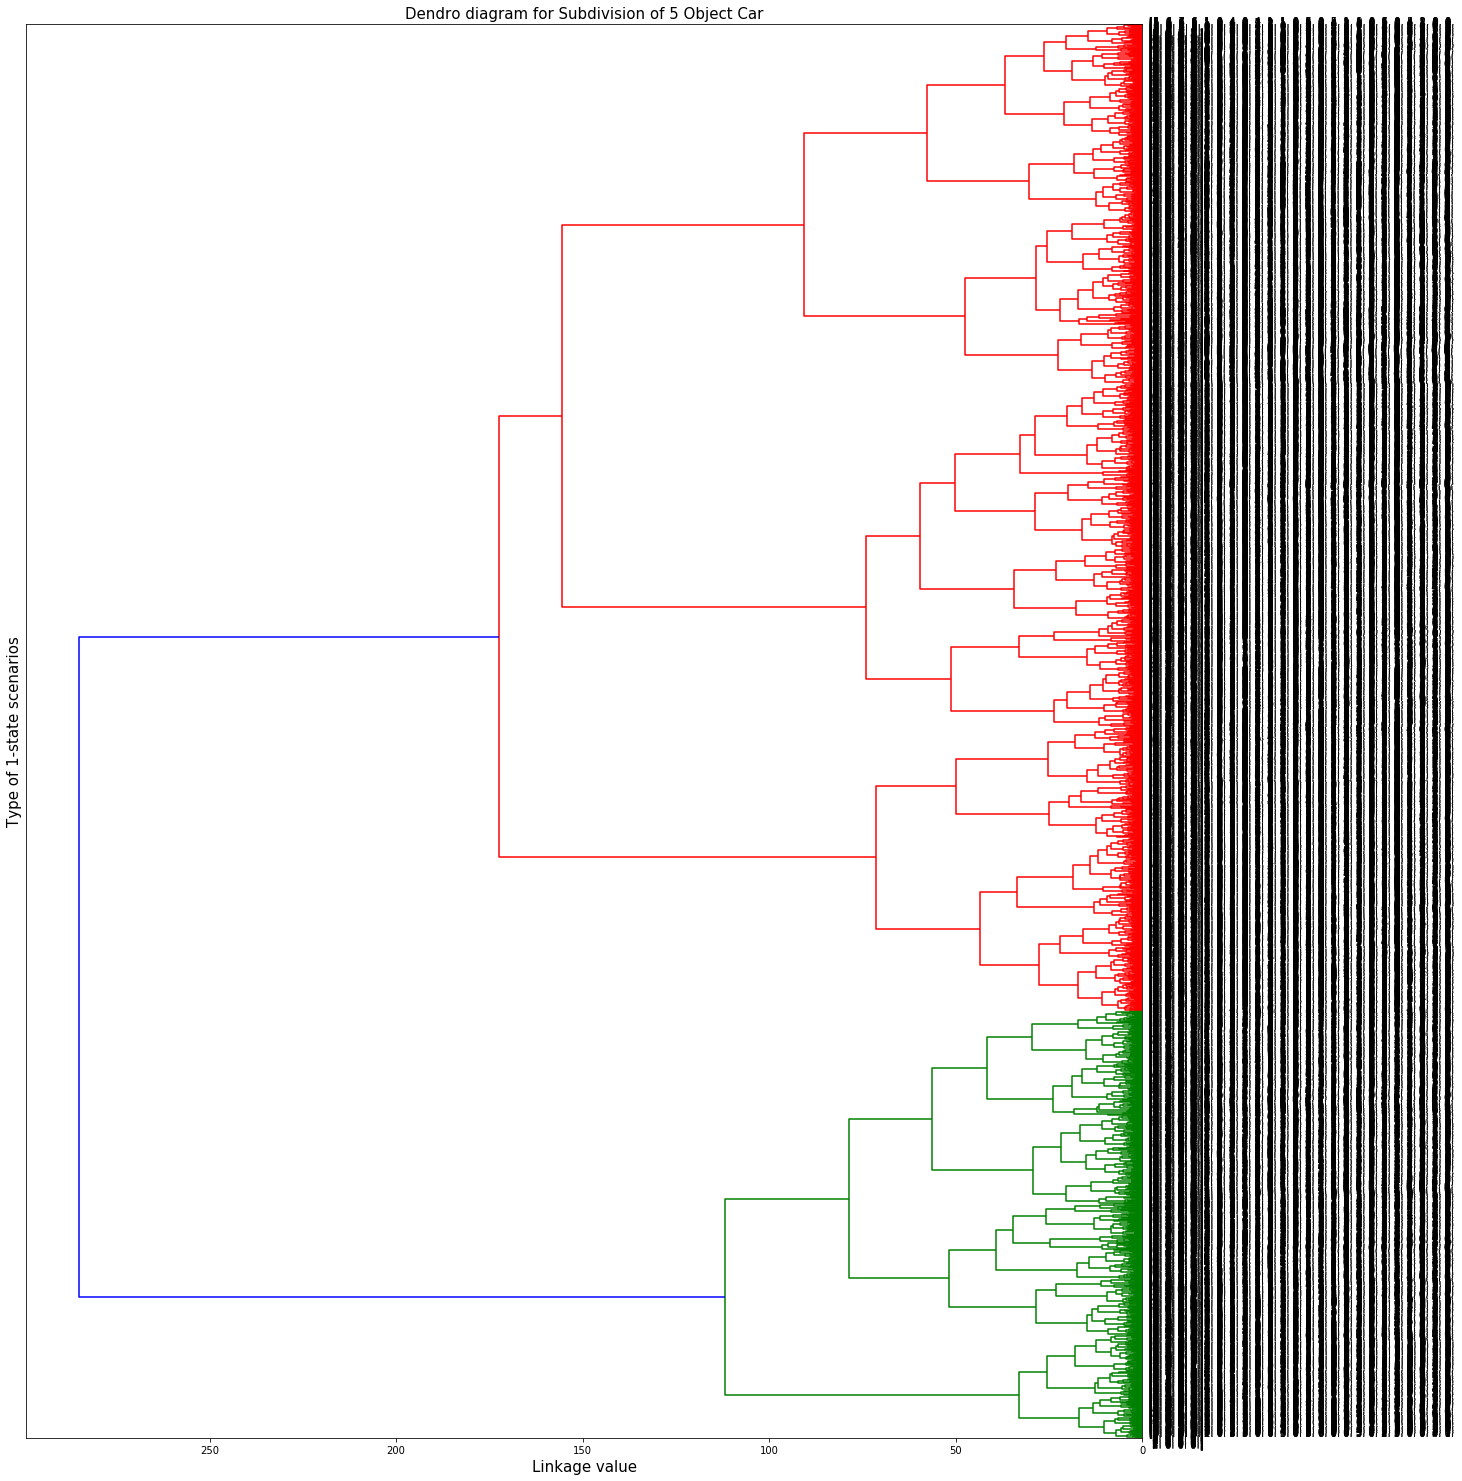

(2725, 4)


In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car5, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 26))
plt.title('Dendro diagram for Subdivision of 5 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str5, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [33]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[2.18000000e+02 2.19000000e+02 1.41421356e+00 2.00000000e+00]
 [2.07000000e+02 2.08000000e+02 1.41421356e+00 2.00000000e+00]
 [3.74000000e+02 3.78000000e+02 1.41421356e+00 2.00000000e+00]
 ...
 [5.44400000e+03 5.44600000e+03 1.55479848e+02 1.35600000e+03]
 [5.44300000e+03 5.44800000e+03 1.72528049e+02 1.90100000e+03]
 [5.44700000e+03 5.44900000e+03 2.84923257e+02 2.72600000e+03]]


329

In [34]:
car6 = matrix_4st[np.where(matrix_4st[:,0]==6),:]
car6 = car6[:,1:]
car6 = np.squeeze(car6,axis= (0,))
str6 = ";".join(str(i) for i in car6)
str6 = str6.split(";")
str6

['[6. 2. 3. 3. 4. 0. 2. 0. 3. 3. 1. 0. 1. 0. 1. 1. 2. 0. 1. 0. 1. 2. 2. 0.\n 1. 0. 3. 0.]',
 '[6. 2. 4. 5. 3. 0. 3. 0. 6. 0. 1. 0. 1. 0. 1. 1. 3. 0. 1. 0. 3. 1. 3. 0.\n 2. 0. 4. 1.]',
 '[6. 3. 2. 3. 3. 0. 3. 0. 5. 1. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0. 2. 0.\n 1. 0. 1. 2.]',
 '[6. 3. 2. 3. 3. 0. 3. 0. 6. 0. 1. 0. 2. 0. 2. 1. 1. 0. 1. 0. 1. 1. 2. 0.\n 1. 0. 1. 2.]',
 '[6. 4. 2. 5. 3. 0. 3. 0. 6. 0. 0. 0. 4. 0. 4. 0. 1. 0. 1. 0. 1. 1. 3. 0.\n 2. 0. 4. 1.]',
 '[6. 4. 3. 4. 4. 0. 2. 0. 4. 2. 2. 0. 2. 0. 4. 0. 1. 0. 2. 0. 2. 1. 2. 0.\n 2. 0. 2. 2.]',
 '[6. 4. 3. 4. 4. 0. 2. 0. 6. 0. 1. 0. 3. 0. 3. 1. 1. 0. 2. 0. 2. 1. 2. 0.\n 2. 0. 2. 2.]',
 '[6. 4. 4. 4. 3. 0. 3. 0. 5. 1. 3. 0. 1. 0. 2. 2. 1. 0. 3. 0. 3. 1. 3. 0.\n 1. 0. 3. 1.]',
 '[6. 4. 4. 4. 4. 0. 2. 0. 6. 0. 1. 0. 3. 0. 4. 0. 1. 0. 3. 0. 3. 1. 3. 0.\n 1. 0. 3. 1.]',
 '[6. 4. 4. 5. 3. 0. 3. 0. 5. 1. 3. 0. 1. 0. 2. 2. 3. 0. 1. 0. 4. 0. 4. 0.\n 1. 0. 5. 0.]',
 '[6. 4. 5. 4. 4. 0. 2. 0. 4. 2. 2. 0. 2. 0. 4. 0. 2. 0. 3. 0. 5. 0. 1. 0.\n 3. 

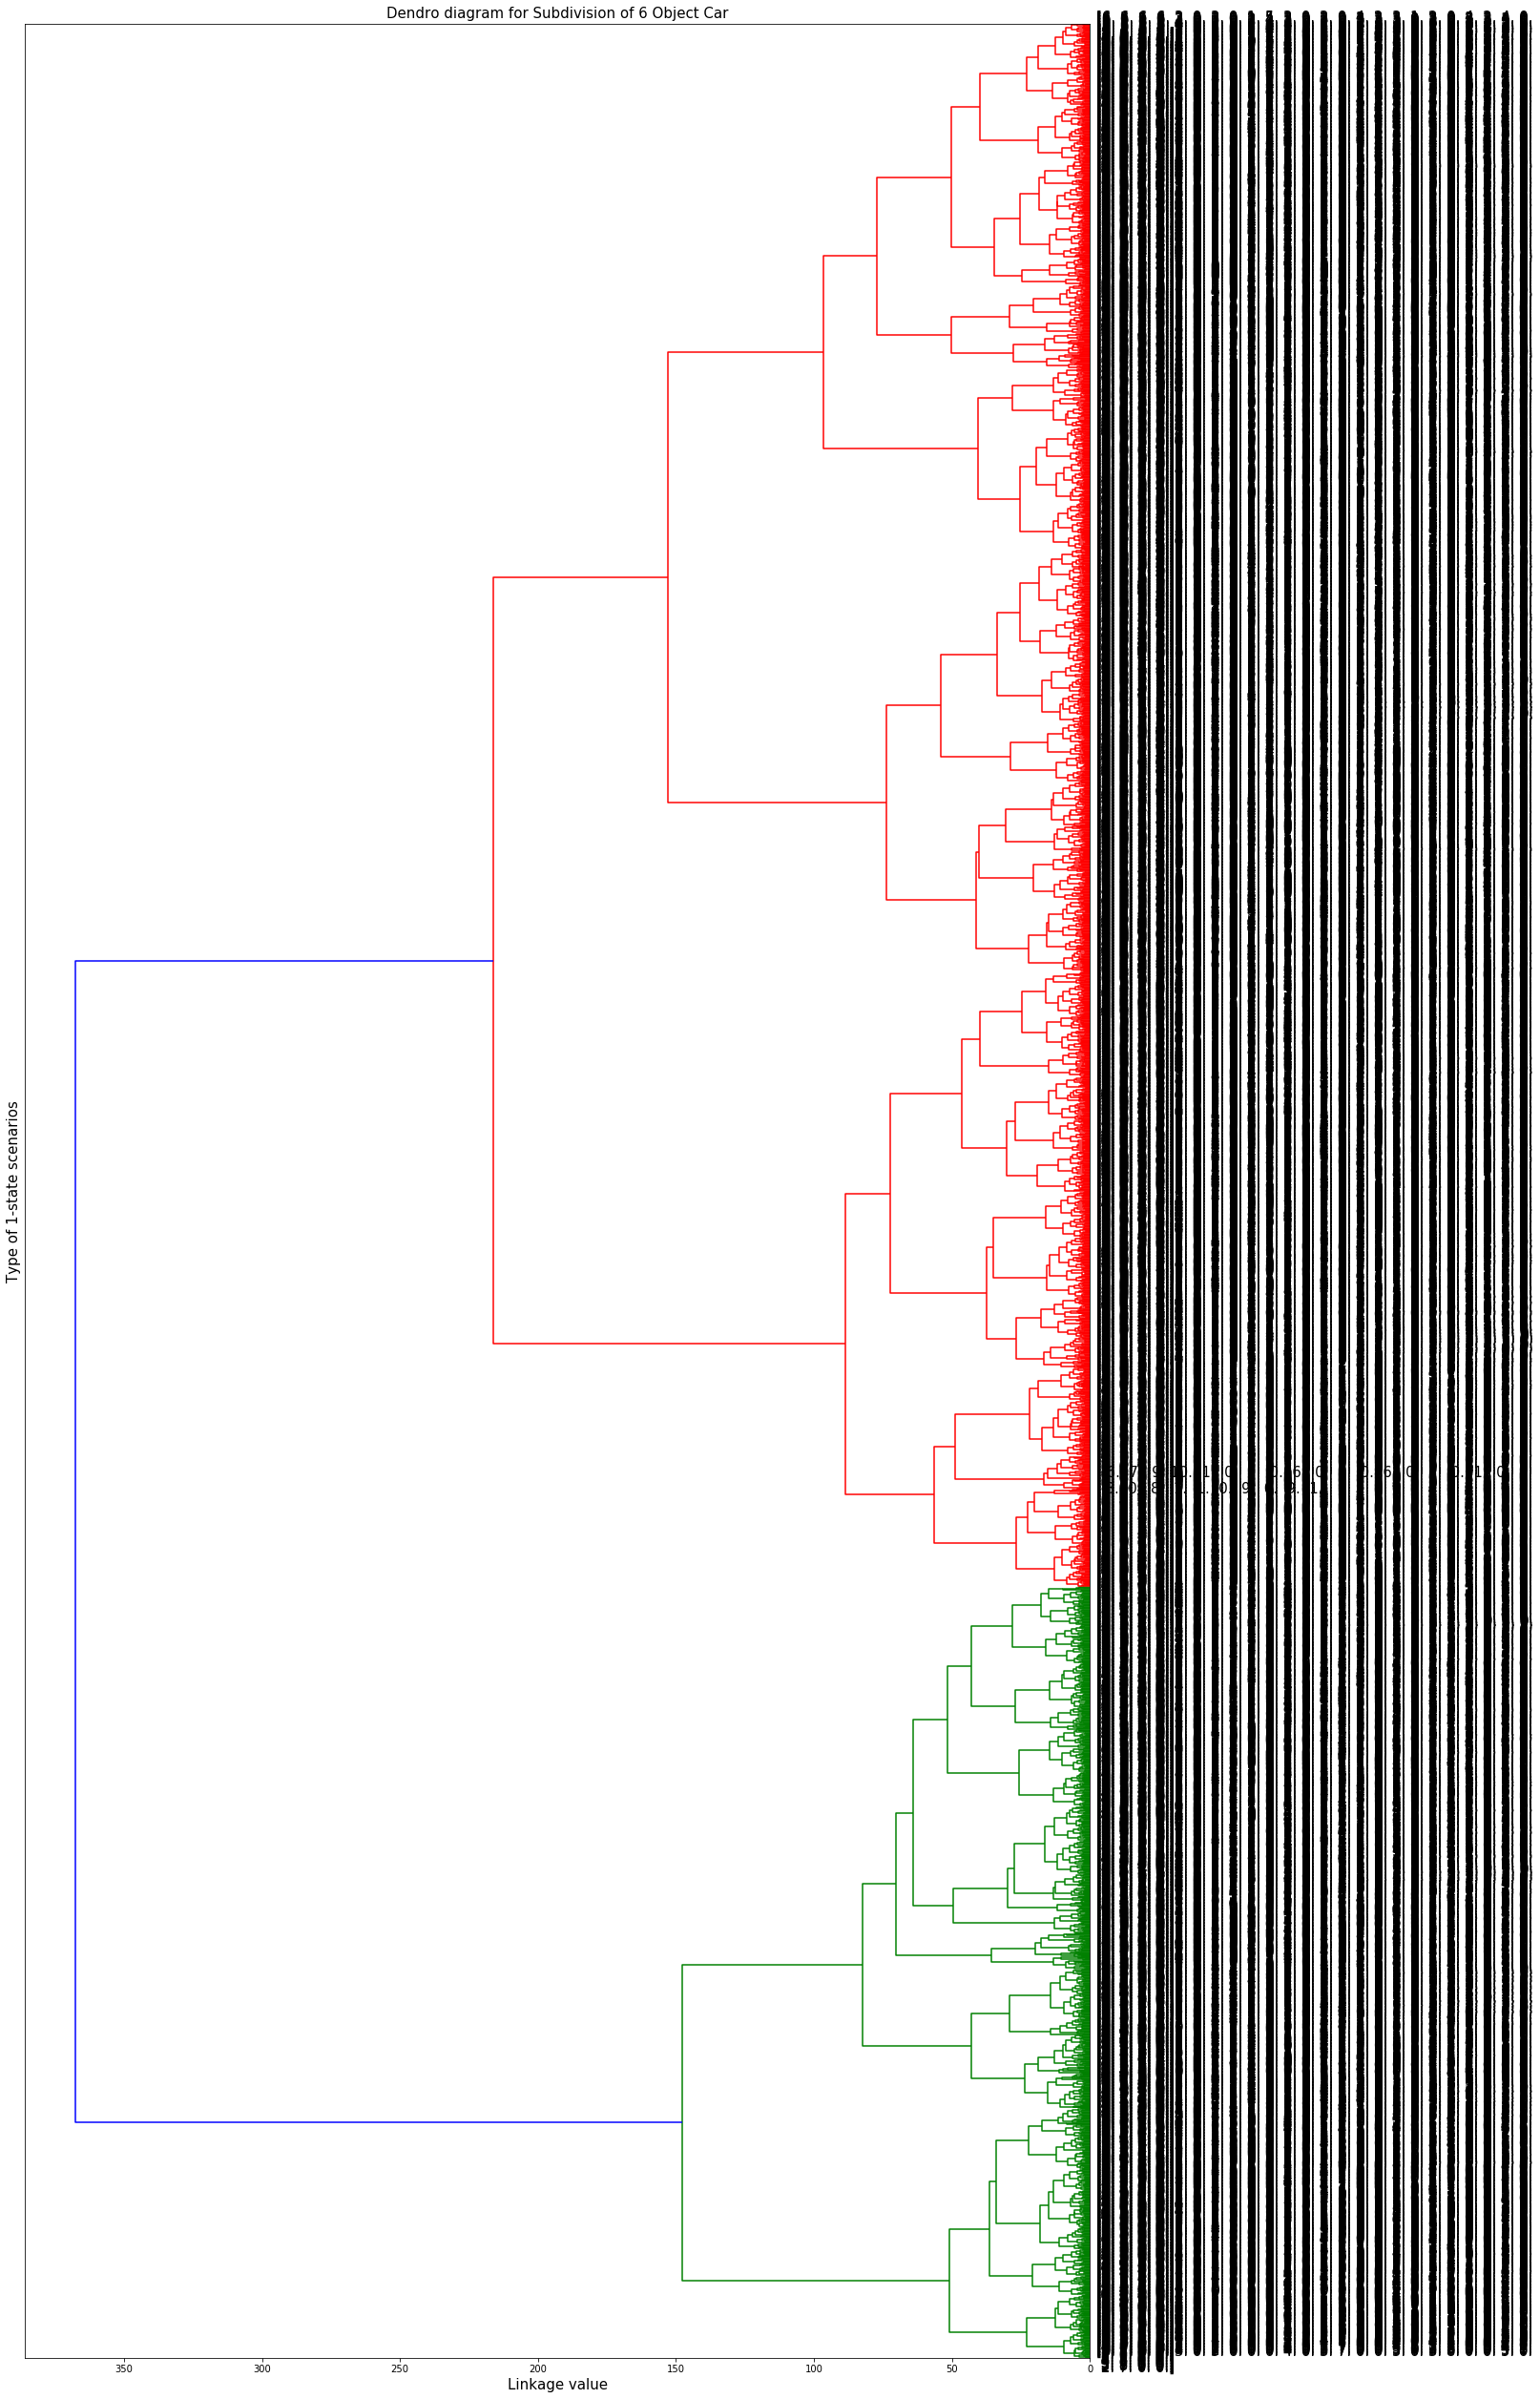

(3277, 4)


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car6, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 45))
plt.title('Dendro diagram for Subdivision of 6 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str6,orientation='left', leaf_rotation=0,
              leaf_font_size=15)

plt.show()
print(Z.shape)

In [36]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[1.97000000e+02 1.98000000e+02 1.41421356e+00 2.00000000e+00]
 [1.22000000e+02 1.26000000e+02 1.41421356e+00 2.00000000e+00]
 [1.07000000e+02 1.09000000e+02 1.41421356e+00 2.00000000e+00]
 ...
 [6.54600000e+03 6.55000000e+03 1.52974026e+02 1.33100000e+03]
 [6.54900000e+03 6.55200000e+03 2.16018208e+02 2.19500000e+03]
 [6.55100000e+03 6.55300000e+03 3.67500075e+02 3.27800000e+03]]


364

In [37]:
car7 = matrix_4st[np.where(matrix_4st[:,0]==7),:]
car7 = car7[:,1:]
car7 = np.squeeze(car7, axis= (0,))
str7 = ";".join(str(i) for i in car7)
str7 = str7.split(";")
str7

['[7. 4. 3. 2. 4. 0. 3. 1. 6. 0. 4. 0. 0. 1. 3. 0. 3. 0. 0. 1. 2. 0. 2. 0.\n 0. 0. 2. 0.]',
 '[7. 5. 4. 3. 0. 0. 7. 0. 4. 3. 0. 0. 5. 0. 2. 3. 0. 0. 4. 0. 2. 2. 0. 0.\n 3. 0. 1. 2.]',
 '[7. 5. 4. 5. 3. 0. 4. 6. 1. 0. 2. 0. 3. 4. 1. 0. 1. 0. 3. 2. 2. 0. 2. 0.\n 3. 2. 3. 0.]',
 '[7. 5. 5. 4. 1. 0. 6. 0. 1. 6. 0. 0. 5. 0. 1. 4. 0. 0. 5. 0. 2. 3. 0. 0.\n 4. 0. 1. 3.]',
 '[7. 5. 5. 4. 1. 0. 6. 0. 4. 3. 0. 0. 5. 0. 3. 2. 0. 0. 5. 0. 1. 4. 0. 0.\n 4. 0. 0. 4.]',
 '[7. 5. 6. 4. 5. 0. 2. 0. 6. 1. 3. 0. 2. 0. 5. 0. 3. 0. 3. 0. 6. 0. 1. 0.\n 3. 0. 3. 1.]',
 '[7. 5. 6. 5. 2. 0. 5. 0. 5. 2. 1. 0. 4. 0. 3. 2. 1. 0. 5. 0. 4. 2. 0. 0.\n 5. 0. 4. 1.]',
 '[7. 5. 6. 6. 2. 0. 5. 0. 6. 1. 1. 0. 4. 0. 5. 0. 1. 1. 4. 0. 5. 1. 2. 0.\n 4. 0. 5. 1.]',
 '[7. 5. 6. 6. 2. 1. 4. 6. 1. 0. 2. 0. 3. 4. 1. 0. 2. 1. 3. 5. 1. 0. 3. 0.\n 3. 5. 1. 0.]',
 '[7. 5. 6. 6. 2. 1. 4. 7. 0. 0. 2. 0. 3. 5. 0. 0. 2. 1. 3. 6. 0. 0. 2. 0.\n 4. 6. 0. 0.]',
 '[7. 5. 6. 6. 3. 0. 4. 0. 2. 5. 2. 0. 3. 0. 1. 4. 2. 1. 3. 0. 1. 5. 3. 0.\n 3. 

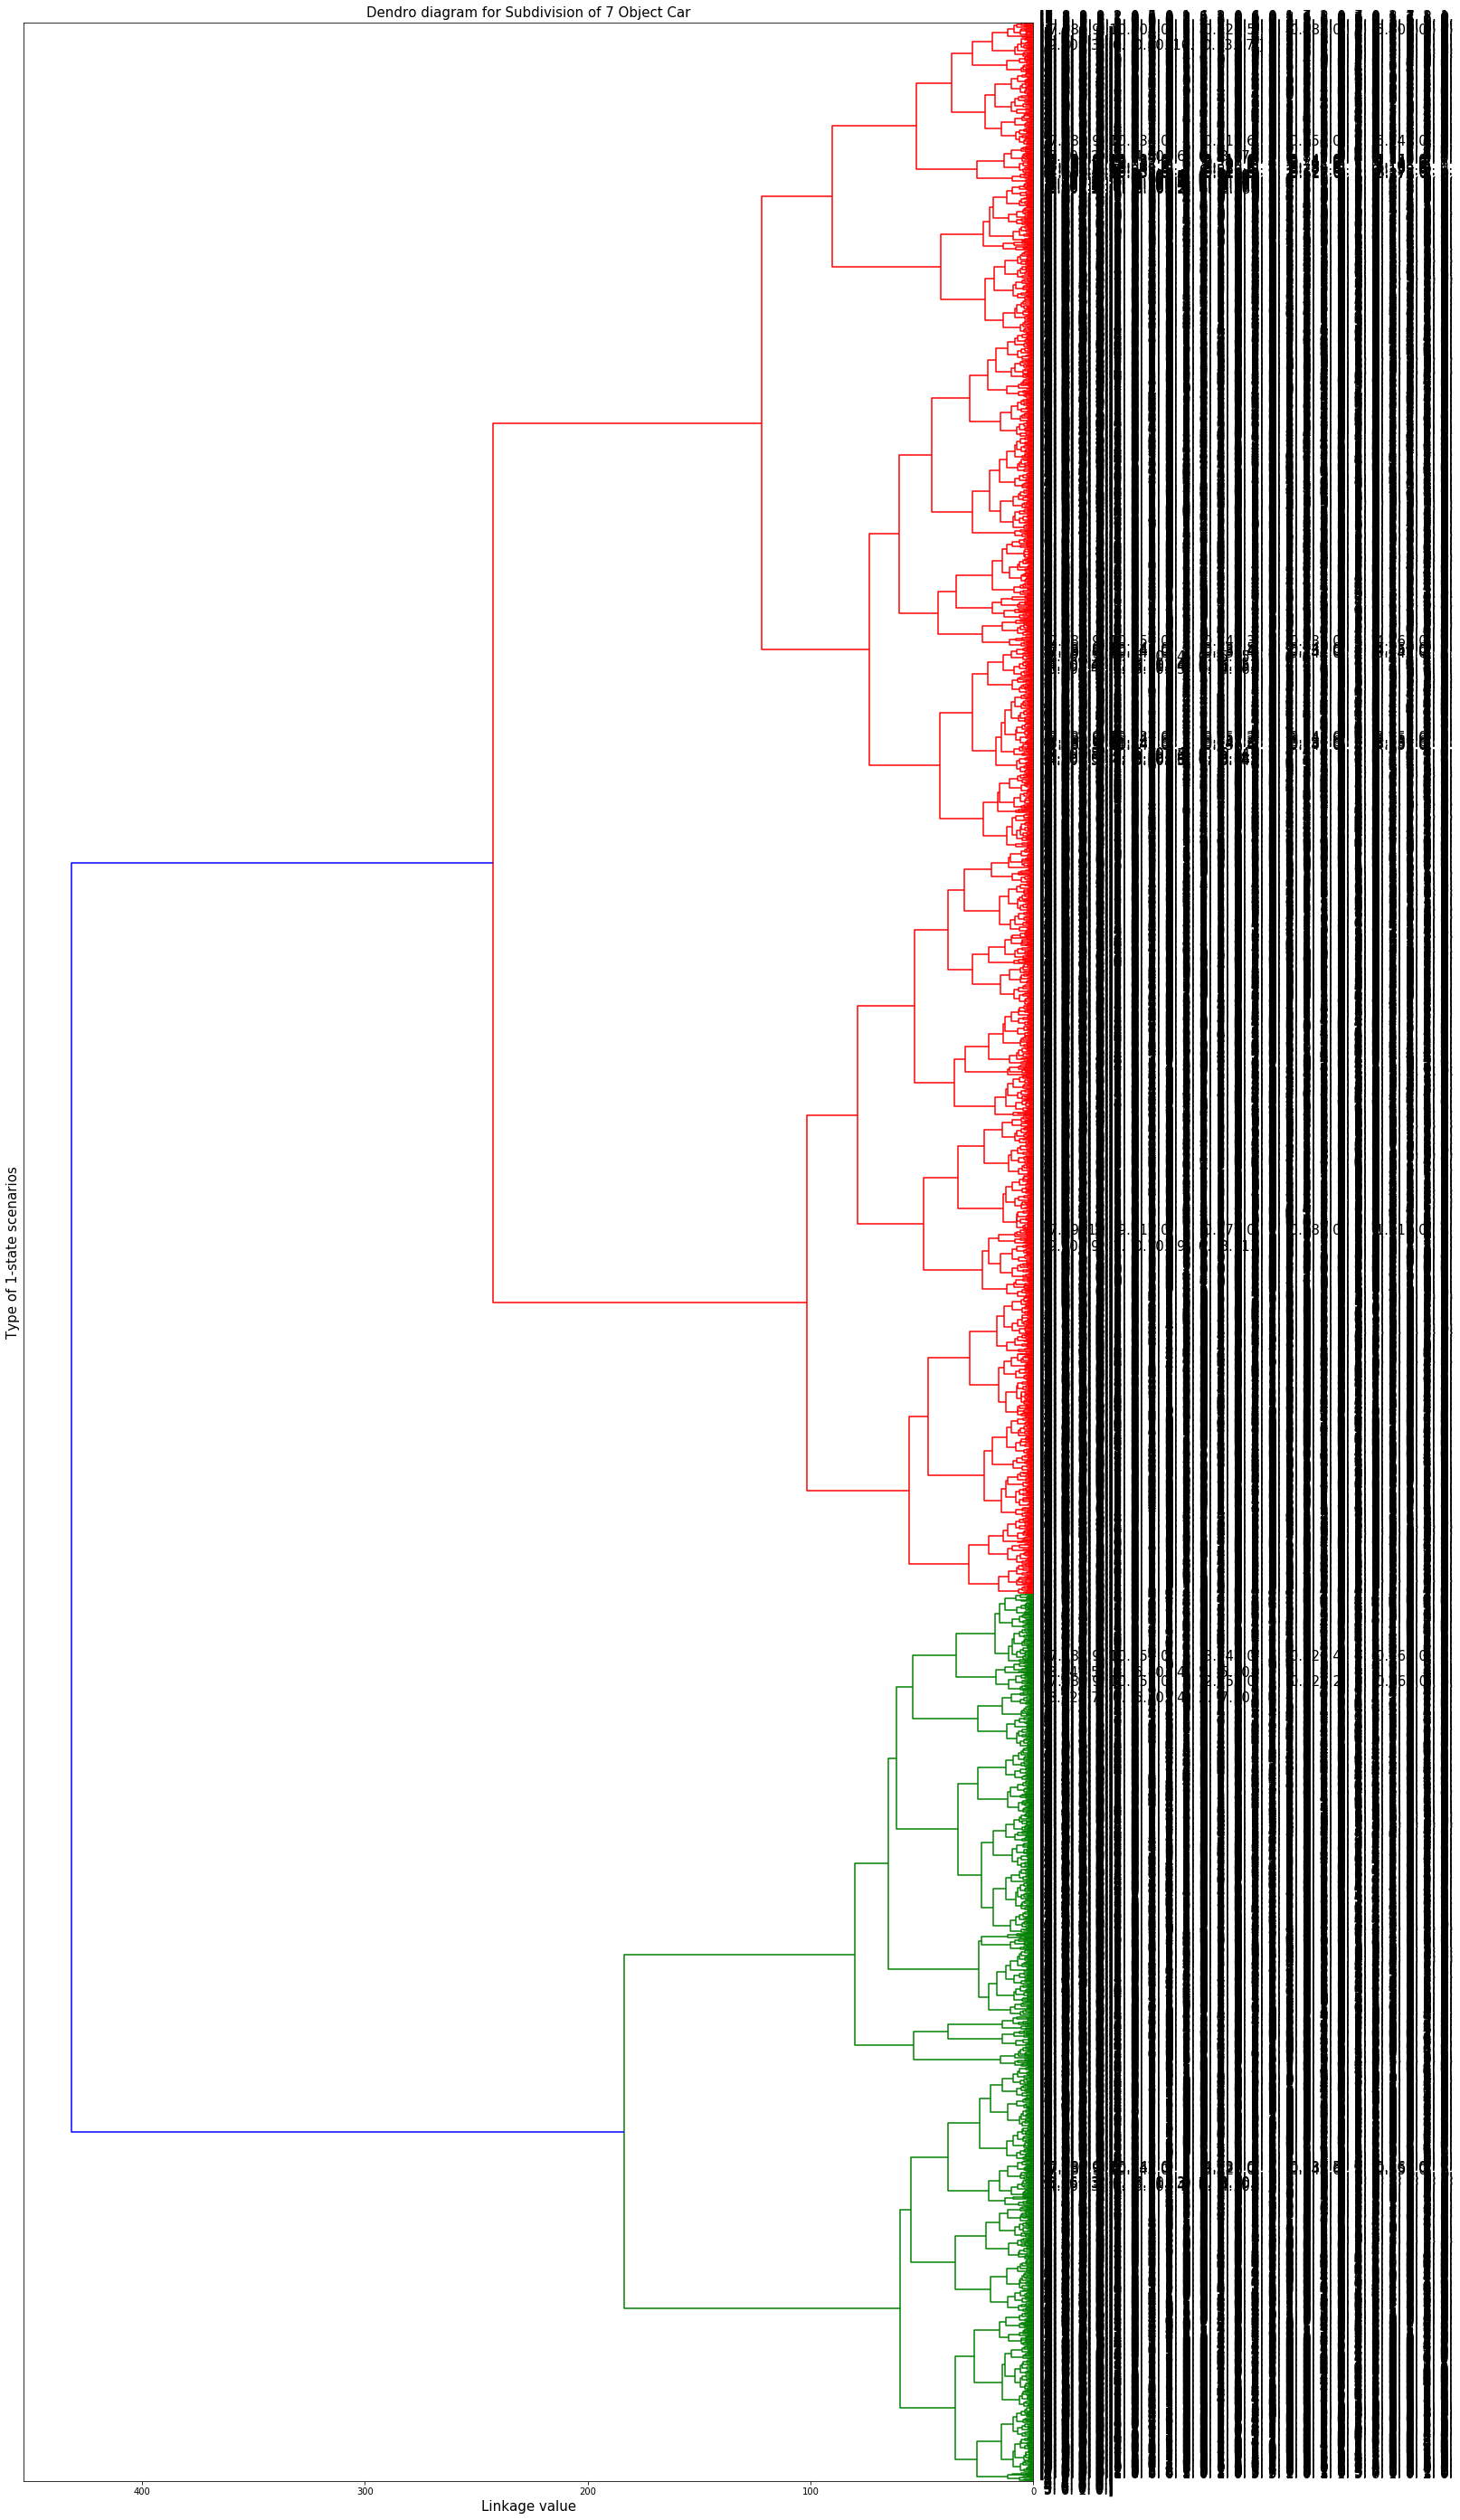

(3180, 4)


In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car7, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 7 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str7, leaf_rotation=0,orientation= 'left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [39]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[1.03000000e+02 1.04000000e+02 1.41421356e+00 2.00000000e+00]
 [4.45000000e+02 4.46000000e+02 1.41421356e+00 2.00000000e+00]
 [7.90000000e+01 8.00000000e+01 1.41421356e+00 2.00000000e+00]
 ...
 [6.34800000e+03 6.35400000e+03 1.83512100e+02 1.14800000e+03]
 [6.35600000e+03 6.35700000e+03 2.42274391e+02 2.03300000e+03]
 [6.35800000e+03 6.35900000e+03 4.31503177e+02 3.18100000e+03]]


339

In [43]:
car8 = matrix_1st[np.where(matrix_1st[:,0]==8),:]
car8 = car8[:,1:]
car8 = np.squeeze(car8,axis= (0,))
str8 = ";".join(str(i) for i in car8)
str8 = str8.split(";")
str8

['[8. 0. 0. 8. 0. 2. 6.]',
 '[8. 0. 0. 8. 0. 3. 5.]',
 '[8. 0. 0. 8. 0. 4. 4.]',
 '[8. 0. 0. 8. 0. 5. 3.]',
 '[8. 0. 0. 8. 0. 6. 2.]',
 '[8. 0. 0. 8. 0. 7. 1.]',
 '[8. 0. 0. 8. 0. 8. 0.]',
 '[8. 0. 0. 8. 2. 6. 0.]',
 '[8. 0. 0. 8. 7. 1. 0.]',
 '[8. 0. 1. 7. 0. 4. 4.]',
 '[8. 0. 1. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 1. 7.]',
 '[8. 1. 0. 7. 0. 2. 6.]',
 '[8. 1. 0. 7. 0. 3. 5.]',
 '[8. 1. 0. 7. 0. 4. 4.]',
 '[8. 1. 0. 7. 0. 5. 3.]',
 '[8. 1. 0. 7. 0. 6. 2.]',
 '[8. 1. 0. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 8. 0.]',
 '[8. 1. 0. 7. 2. 6. 0.]',
 '[8. 1. 0. 7. 3. 5. 0.]',
 '[8. 1. 1. 6. 0. 3. 5.]',
 '[8. 1. 1. 6. 0. 4. 4.]',
 '[8. 1. 1. 6. 0. 5. 3.]',
 '[8. 1. 1. 6. 0. 6. 2.]',
 '[8. 1. 1. 6. 0. 7. 1.]',
 '[8. 1. 1. 6. 2. 6. 0.]',
 '[8. 1. 1. 6. 3. 5. 0.]',
 '[8. 1. 1. 6. 4. 4. 0.]',
 '[8. 1. 1. 6. 5. 3. 0.]',
 '[8. 1. 1. 6. 6. 2. 0.]',
 '[8. 2. 0. 6. 0. 0. 8.]',
 '[8. 2. 0. 6. 0. 1. 7.]',
 '[8. 2. 0. 6. 0. 2. 6.]',
 '[8. 2. 0. 6. 0. 3. 5.]',
 '[8. 2. 0. 6. 0. 4. 4.]',
 '[8. 2. 0. 6. 0. 5. 3.]',
 

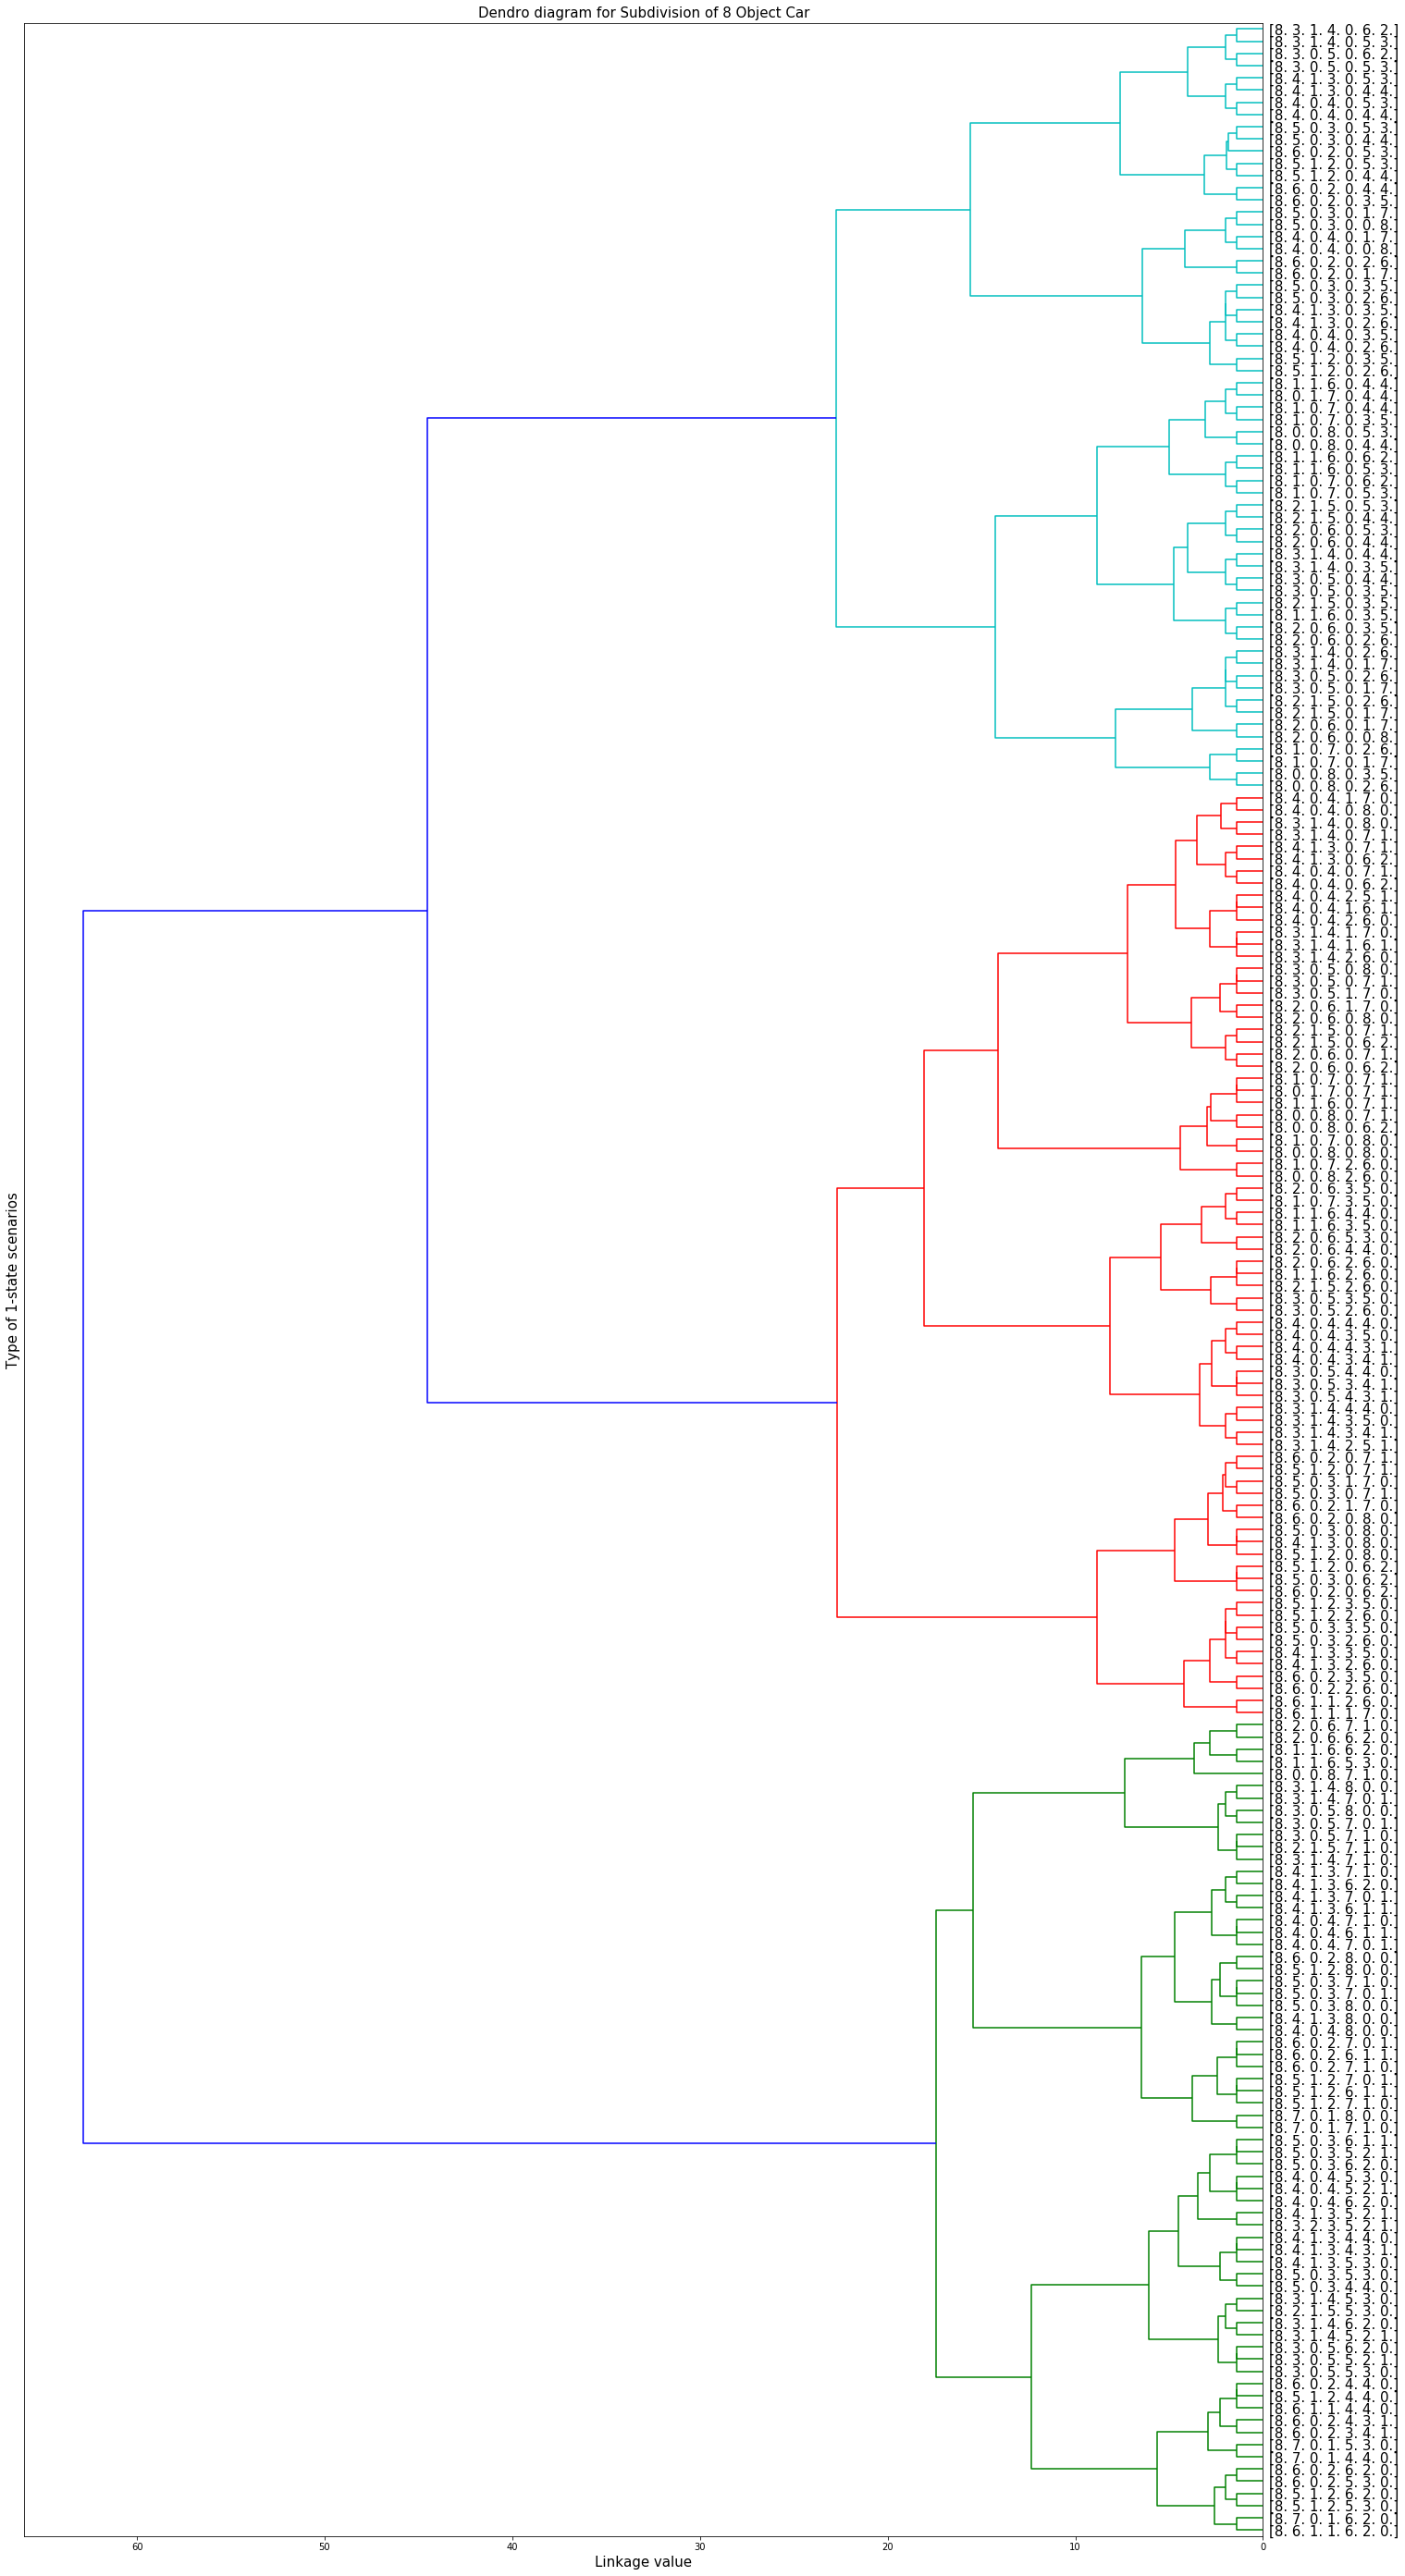

(205, 4)


In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car8, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(24, 50))
plt.title('Dendro diagram for Subdivision of 8 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str8, leaf_rotation=0,orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [45]:
car9 = matrix_1st[np.where(matrix_1st[:,0]==9),:]
car9 = car9[:,1:]
car9 = np.squeeze(car9,axis= (0,))
str9 = ";".join(str(i) for i in car9)
str9 = str9.split(";")
str9

['[9. 0. 0. 9. 0. 2. 7.]',
 '[9. 0. 0. 9. 0. 3. 6.]',
 '[9. 0. 0. 9. 0. 4. 5.]',
 '[9. 0. 0. 9. 0. 5. 4.]',
 '[9. 0. 0. 9. 0. 6. 3.]',
 '[9. 0. 0. 9. 0. 7. 2.]',
 '[9. 0. 0. 9. 0. 8. 1.]',
 '[9. 0. 0. 9. 0. 9. 0.]',
 '[9. 0. 0. 9. 8. 1. 0.]',
 '[9. 1. 0. 8. 0. 4. 5.]',
 '[9. 1. 0. 8. 0. 5. 4.]',
 '[9. 1. 0. 8. 0. 6. 3.]',
 '[9. 1. 0. 8. 0. 7. 2.]',
 '[9. 1. 0. 8. 0. 8. 1.]',
 '[9. 1. 0. 8. 0. 9. 0.]',
 '[9. 1. 0. 8. 2. 7. 0.]',
 '[9. 1. 1. 7. 0. 5. 4.]',
 '[9. 1. 1. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 2. 7.]',
 '[9. 2. 0. 7. 0. 3. 6.]',
 '[9. 2. 0. 7. 0. 4. 5.]',
 '[9. 2. 0. 7. 0. 5. 4.]',
 '[9. 2. 0. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 7. 2.]',
 '[9. 2. 0. 7. 0. 8. 1.]',
 '[9. 2. 0. 7. 0. 9. 0.]',
 '[9. 2. 0. 7. 2. 7. 0.]',
 '[9. 2. 0. 7. 4. 5. 0.]',
 '[9. 2. 0. 7. 5. 4. 0.]',
 '[9. 2. 1. 6. 0. 2. 7.]',
 '[9. 2. 1. 6. 0. 4. 5.]',
 '[9. 2. 1. 6. 0. 5. 4.]',
 '[9. 2. 1. 6. 0. 6. 3.]',
 '[9. 2. 1. 6. 0. 7. 2.]',
 '[9. 2. 1. 6. 0. 8. 1.]',
 '[9. 2. 1. 6. 0. 9. 0.]',
 '[9. 2. 1. 6. 5. 4. 0.]',
 

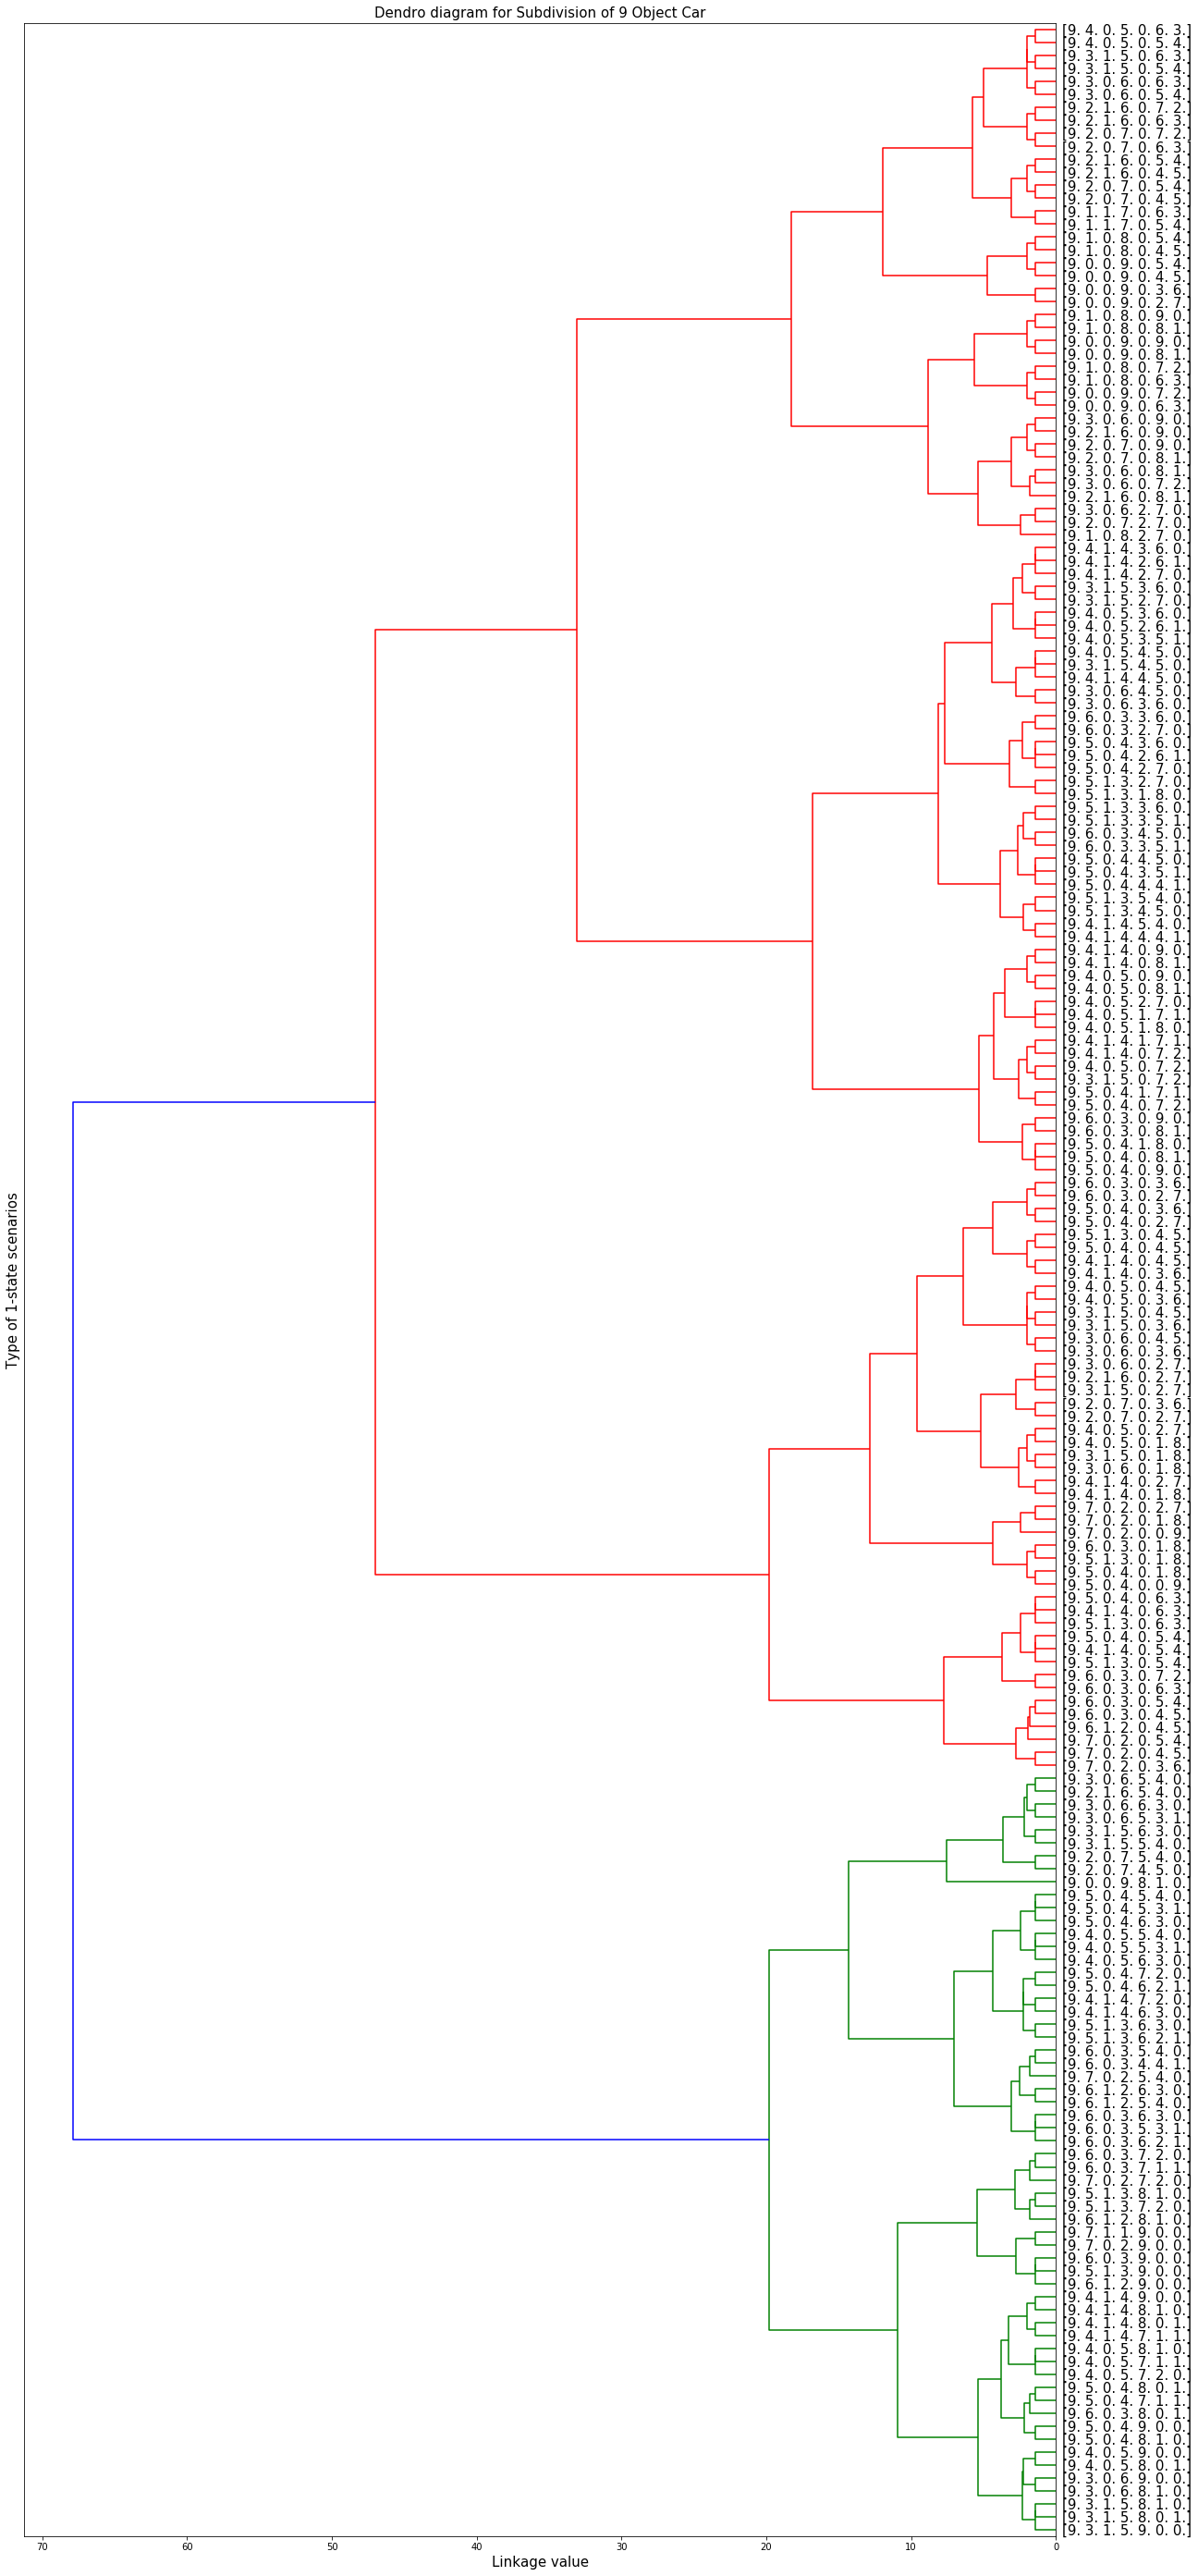

(193, 4)


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car9, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 9 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str9, orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)